In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

Problem (3):

a. Since X3 represents the education level (1 for College, 0 for High School) and the coefficient for X3 is 35, the model predicts that, all other factors being equal, college graduates will earn $35,000 more than high school graduates. However, there is an additional interaction term between GPA and education level, with a coefficient of 10. This means that when GPA is sufficiently high (specifically greater than 3.5), the interaction effect can result in high school graduates earning more than college graduates.

The correct answer is:
"For a fixed value of IQ and GPA, high school graduates earn more, on average, than college graduates provided that the GPA is high enough."

b.

In [ ]:
def f(gpa, iq, level):
    return 50 + 20*gpa + 0.07*iq + 35*level + 0.01*gpa*iq + (-10*gpa*level)

gpa = 4
iq  = 110
level = 1

print('$' + str(f(gpa, iq, level) * 1000))

$137100.0


c.

False. A small coefficient does not imply there's little evidence of an interaction effect. The significance of the interaction depends on the standard error. If the SE is also very small then the interaction effect could still be statistically significant, meaning the interaction has a meaningful impact on the model.

In [ ]:
auto = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Auto.csv')
auto = auto.dropna()
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
auto['horsepower'] = pd.to_numeric(auto['horsepower'], errors='coerce')

auto = auto.dropna(subset=['horsepower'])

X = auto['horsepower']
y = auto['mpg']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 24 Sep 2024   Prob (F-statistic):           7.03e-81
Time:                        21:32:38   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

i. Yes, the p-value of the horsepower is less than 0.05. Therefore, there is a statistically significant relationship between the predictor (horsepower) and the response (mpg).

ii. The relationship is strong since the R-Squared value is closer to 1.

iii. There is a negative relationship between horsepower and mpg since we can notice that as horsepower increases, mpg decreases.

iv.

In [ ]:
horsepower_98 = pd.DataFrame({'const': [1], 'horsepower': [98]})
predicted_mpg = model.get_prediction(horsepower_98)

prediction_summary = predicted_mpg.summary_frame(alpha=0.05)

print(prediction_summary)

        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  24.467077  0.251262      23.973079      24.961075     14.809396   

   obs_ci_upper  
0     34.124758  


In [ ]:
confidence_interval = [prediction_summary['mean_ci_lower'].values[0], prediction_summary['mean_ci_upper'].values[0]]
print("Confidence Interval for predicted mpg:", confidence_interval)

Confidence Interval for predicted mpg: [23.973078960703948, 24.961075344320914]


Problem 10

a.

In [ ]:
carseats = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Carseats.csv')
carseats = carseats.dropna()
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
# Convert 'Urban' and 'US' to integer (0 and 1)
carseats['Urban'] = carseats['Urban'].astype(int)
carseats['US'] = carseats['US'].astype(int)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Tue, 24 Sep 2024   Prob (F-statistic):           2.39e-23
Time:                        23:44:09   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.0

b.
Intercept: When all predictors (Price, Urban, and US) are 0, the expected value of Sales is 13.0435 units.

The coefficient for Price is -0.0545. This means that for every unit increase in price, the sales are expected to decrease by 0.0545 units.

The coefficient for Urban is -0.0219 which suggests that stores located in urban areas have slightly lower sales.

The coefficient for US is 1.2006 which suggests that stores located in the US area have higher sales.

c. Sales= B0 (Intercept) + B1 * Price + B2 * Urban_Yes + B3 * US_Yes

Sales=13.0435 - 0.0545 * Price - 0.0219 * Urban_Yes + 1.2006 * US_Yes

d. For US and Price

Problem 14

a.

In [ ]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

The form of the linear mode: y^= B0 + B1 * x1 + B2 * x2 + residual
where the coefficient for B0 is 2, the coefficient for B1 is 2 and the coefficient for B2 is 0.3

b.

Correlation coefficient: 0.8390596222844917


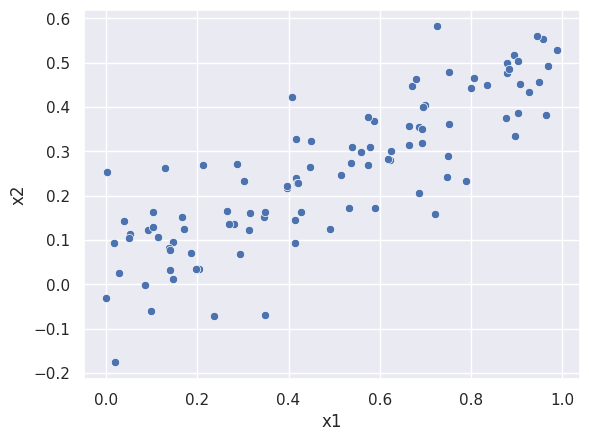

In [ ]:
np.random.seed(1)

x1 = np.random.uniform(0, 1, 100)
x2 = 0.5 * x1 + np.random.normal(0, 0.1, 100)

correlation = np.corrcoef(x1, x2)[0, 1]

df = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})
sns.scatterplot(x='x1', y='x2', data=df);

print('Correlation coefficient: ' + str(correlation))

c.

In [ ]:
y = 2 + 2 * x1 + 0.3 * x2 + np.random.normal(0, 1, 100)

X = sm.add_constant(np.column_stack((x1, x2)))

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     23.82
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           3.85e-09
Time:                        00:56:39   Log-Likelihood:                -137.90
No. Observations:                 100   AIC:                             281.8
Df Residuals:                      97   BIC:                             289.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8728      0.190      9.856      0.0

The coefficient for:
B0^= 2.1893 which is close to the true intercept 2
B1^= 0.7046 which is way smaller than the true coefficient 2
B2^= 2.5024 which is way greater than the true coefficient .3

For H0 : B1 = 0, the p-value for x1 is 0.271 which is greater than 0.05. We can't reject the null hypothesis.

For H0: B2 = 0, the p-value for x2 is 0.031 which is less than 0.05. We can reject the null hypothesis.


d.

In [ ]:
np.random.seed(1)
x1 = np.random.uniform(0, 1, 100)
y = 2 + 2 * x1 + np.random.normal(0, 1, 100)

X = sm.add_constant(x1)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     30.15
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           3.15e-07
Time:                        01:22:20   Log-Likelihood:                -130.72
No. Observations:                 100   AIC:                             265.4
Df Residuals:                      98   BIC:                             270.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2370      0.174     12.832      0.0

The p-value for x1 is extremely small, which is much smaller than the significance level (typically 0.05). Therefore, we can reject the null hypothesis H0: B1=0

e.

In [ ]:
np.random.seed(1)
x1 = np.random.uniform(0, 1, 100)
x2 = 0.5 * x1 + np.random.uniform(0, 0.1, 100)
y = 2 + 2 * x1 + np.random.normal(0, 1, 100)

X = sm.add_constant(x2)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     25.30
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           2.22e-06
Time:                        01:21:46   Log-Likelihood:                -145.45
No. Observations:                 100   AIC:                             294.9
Df Residuals:                      98   BIC:                             300.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0446      0.229      8.929      0.0

The p-value for x2 is extremely small, which is much smaller than the significance level (typically 0.05). Therefore, we can reject the null hypothesis H0: B2=0

f. Yes, the results for the p-value associated with x1 are contradictory. In part (c), the p-value is large enough that we would fail to reject the null hypothesis H0: B1 = 0, suggesting that x1 is not significant. However, in part (d), when x1 is used on its own, the p-value is small, leading us to reject the null hypothesis and conclude that x1 is a significant predictor of y.

g.

In [ ]:
x1_new = np.concatenate([x1, [0.1]])
x2_new = np.concatenate([x2, [0.8]])
y_new = np.concatenate([y, [6]])

# For Model (c)
X_both_new = sm.add_constant(np.column_stack((x1_new, x2_new)))
model_c = sm.OLS(y_new, X_both_new).fit()

# For Model (d)
X_x1_new = sm.add_constant(x1_new)
model_d = sm.OLS(y_new, X_x1_new).fit()

# For Model (e)
X_x2_new = sm.add_constant(x2_new)
model_e = sm.OLS(y_new, X_x2_new).fit()

# Print the summaries for the fitted models
print(model_c.summary())  # Summary for the model with both x1 and x2
print(model_d.summary())    # Summary for the model with only x1
print(model_e.summary())    # Summary for the model with only x2


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     19.16
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           9.49e-08
Time:                        01:50:12   Log-Likelihood:                -132.39
No. Observations:                 101   AIC:                             270.8
Df Residuals:                      98   BIC:                             278.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0335      0.193     10.512      0.0

In each of the models, the new observation is both an outlier and a high-leverage point.